In [1]:
import torch
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [2]:

sys.path.append('c:\\Users\\maciek\\Documents\\ConwaysGameOfLife')

In [3]:
train_dataset = torch.load("../datasets/train_dataset.pt")
test_dataset = torch.load("../datasets/test_dataset.pt")

### Dataset size

In [4]:
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 100000
Test dataset size: 10000


In [5]:
train_dataset[10]

(tensor([[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 1., 0., 0., 1., 1., 0.],
          [0., 1., 0., 1., 0., 0., 0.],
          [0., 0., 1., 1., 1., 1., 0.],
          [0., 0., 0., 1., 1., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0.]]]),
 tensor([[0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 1., 1., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 1., 1.],
         [0., 0., 0., 1., 1., 1., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]]))

### Dataset mean and standard deviation

In [6]:
live_cells_initial = []
live_cells_evolved = []

for initial_state, evolved_state in train_dataset:
    live_cells_initial.append(initial_state.sum().item())
    live_cells_evolved.append(evolved_state.sum().item())

# Convert to torch tensors for easier computation
live_cells_initial = torch.tensor(live_cells_initial, dtype=torch.float)
live_cells_evolved = torch.tensor(live_cells_evolved, dtype=torch.float)

# Calculate the mean
average_live_cells_initial = torch.mean(live_cells_initial).item()
average_live_cells_evolved = torch.mean(live_cells_evolved).item()

# Calculate the standard deviation
std_dev_initial = torch.std(live_cells_initial).item()
std_dev_evolved = torch.std(live_cells_evolved).item()


print(f"Average number of live cells in initial state: {average_live_cells_initial}")
print(f"Average number of live cells in evolved state: {average_live_cells_evolved}")
print(f"Standard deviation of live cells in initial state: {std_dev_initial}")
print(f"Standard deviation of live cells in evolved state: {std_dev_evolved}")

Average number of live cells in initial state: 7.945539951324463
Average number of live cells in evolved state: 7.032820224761963
Standard deviation of live cells in initial state: 3.895798444747925
Standard deviation of live cells in evolved state: 4.235462665557861


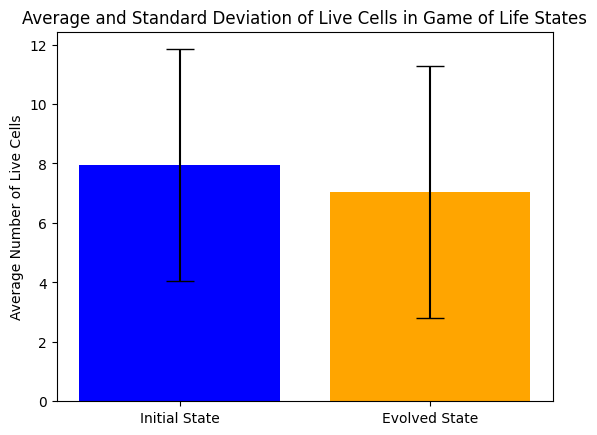

In [7]:
means = [average_live_cells_initial, average_live_cells_evolved]
std_devs = [std_dev_initial, std_dev_evolved]
labels = ['Initial State', 'Evolved State']

plt.bar(labels, means, yerr=std_devs, capsize=10, color=['blue', 'orange'])
plt.ylabel('Average Number of Live Cells')
plt.title('Average and Standard Deviation of Live Cells in Game of Life States')

plt.show()

### Distribution of initial and evolved state

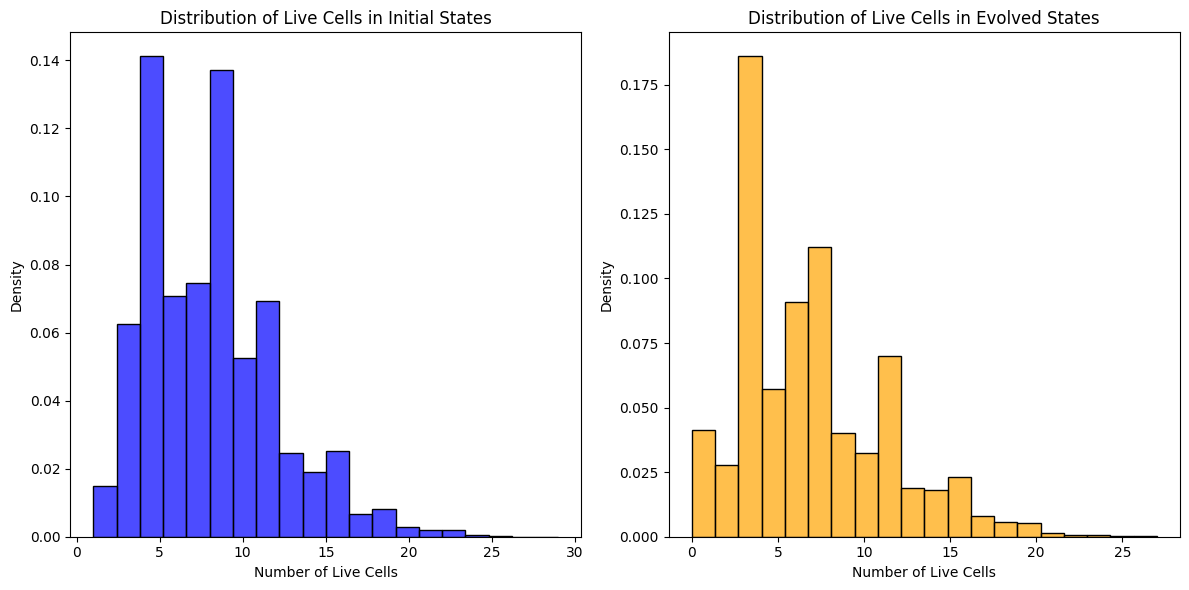

In [8]:
plt.figure(figsize=(12, 6))

# Histogram and KDE for initial states
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(live_cells_initial, bins=20, color='blue', alpha=0.7, stat="density")
plt.title('Distribution of Live Cells in Initial States')
plt.xlabel('Number of Live Cells')
plt.ylabel('Density')

# Histogram and KDE for evolved states
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(live_cells_evolved, bins=20, color='orange', alpha=0.7, stat="density")
plt.title('Distribution of Live Cells in Evolved States')
plt.xlabel('Number of Live Cells')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

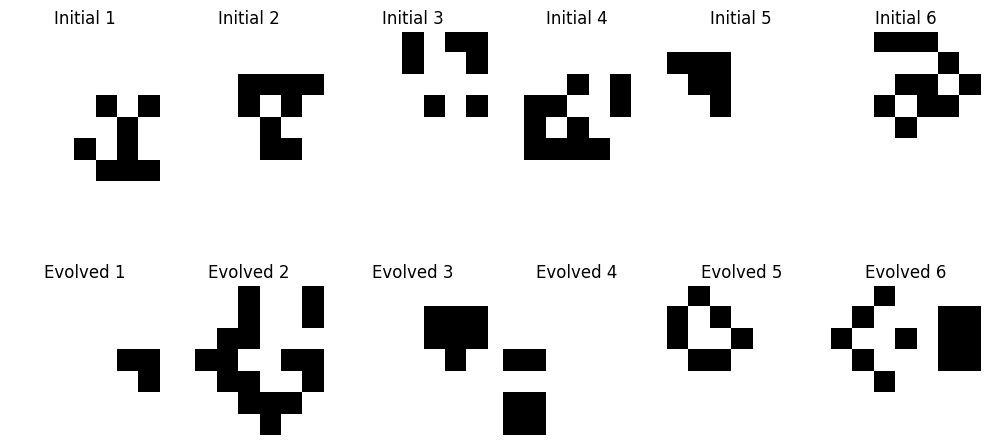

In [9]:
num_states = 6
start = 12
fig, axes = plt.subplots(nrows=2, ncols=num_states, figsize=(10, 6))

for i in range(num_states):
    pos = i + start
    # Display initial state
    axes[0, i].imshow(train_dataset[pos][0][0].numpy(), cmap='binary')
    axes[0, i].set_title(f'Initial {i+1}')
    axes[0, i].axis('off')  # Turn off axis

    # Display evolved state
    axes[1, i].imshow(train_dataset[pos][1].numpy(), cmap='binary')
    axes[1, i].set_title(f'Evolved {i+1}')
    axes[1, i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [10]:
from src.view.game_of_life_visualizer import GameOfLifeVisualizer
from src.network.basic_cnn import LitSimpleCNN
from src.model.game_of_life import GameOfLife

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [11]:
def display_nn_results(initial_states):
    game = GameOfLife(size=7)
    evolved_states = torch.zeros_like(initial_states)
    for i in range(initial_states.shape[0]):
        game = GameOfLife(size=7)
        game.set_board(initial_states[i])
        game.evaluate_board(5)
        evolved_states[i] = game.get_board()
    

    evolved_states_pred = torch.zeros_like(initial_states)
    model = LitSimpleCNN.load_from_checkpoint("../saved_models/model_checkpoint.ckpt")
    model.eval()
    with torch.no_grad():
        evolved_states_pred = torch.round(model(initial_states.unsqueeze(1))).squeeze(1)
        

    fig, axes = plt.subplots(nrows=3, ncols=len(initial_states), figsize=(10, 9))

    for i in range(len(initial_states)):
        # Display initial state
        axes[0, i].imshow(initial_states[i].numpy(), cmap='binary')
        axes[0, i].set_title(f'Initial {i+1}')

        # Display evolved state
        axes[1, i].imshow(evolved_states[i].numpy(), cmap='binary')
        axes[1, i].set_title(f'Evolved {i+1}')
        
        # Display evolved predicted state
        axes[2, i].imshow(evolved_states_pred[i].numpy(), cmap='binary')
        axes[2, i].set_title(f'Pred {i+1}')

    plt.tight_layout()
    plt.show()
    


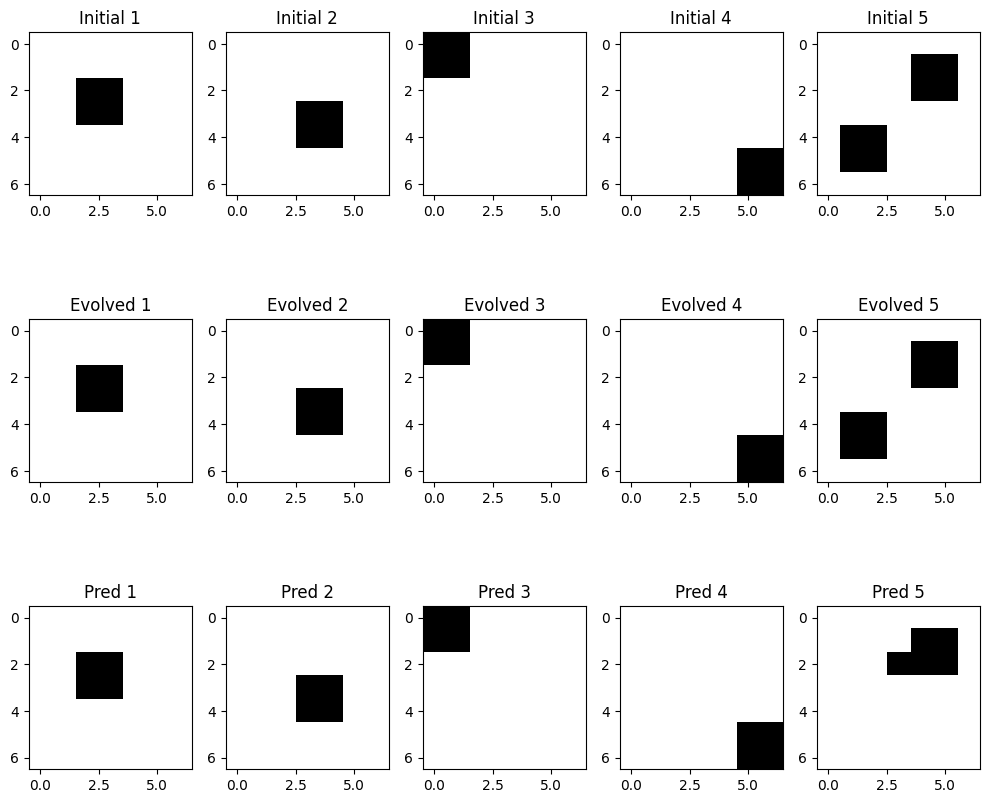

In [12]:
initial_states = torch.tensor([
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 0., 0.],
    [0., 0., 0., 1., 1., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[1., 1., 0., 0., 0., 0., 0.],
    [1., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 1.],
    [0., 0., 0., 0., 0., 1., 1.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 1., 0., 0., 0., 0.],
    [0., 1., 1., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]]
    ])

display_nn_results(initial_states)

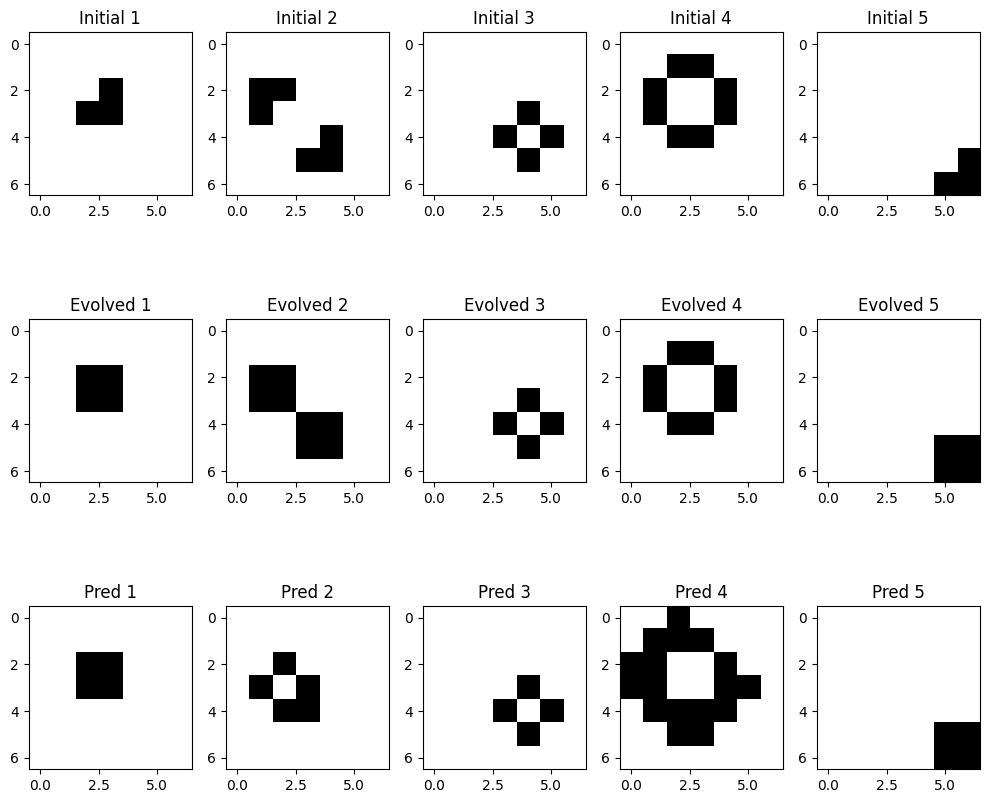

In [13]:
initial_states = torch.tensor([
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 1., 0., 0., 0., 0.],
    [0., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0.],
    [0., 0., 0., 1., 1., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0.],
    [0., 0., 0., 1., 0., 1., 0.],
    [0., 0., 0., 0., 1., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 1., 0., 0., 1., 0., 0.],
    [0., 1., 0., 0., 1., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 1.],
    [0., 0., 0., 0., 0., 1., 1.]]
    ])

display_nn_results(initial_states)

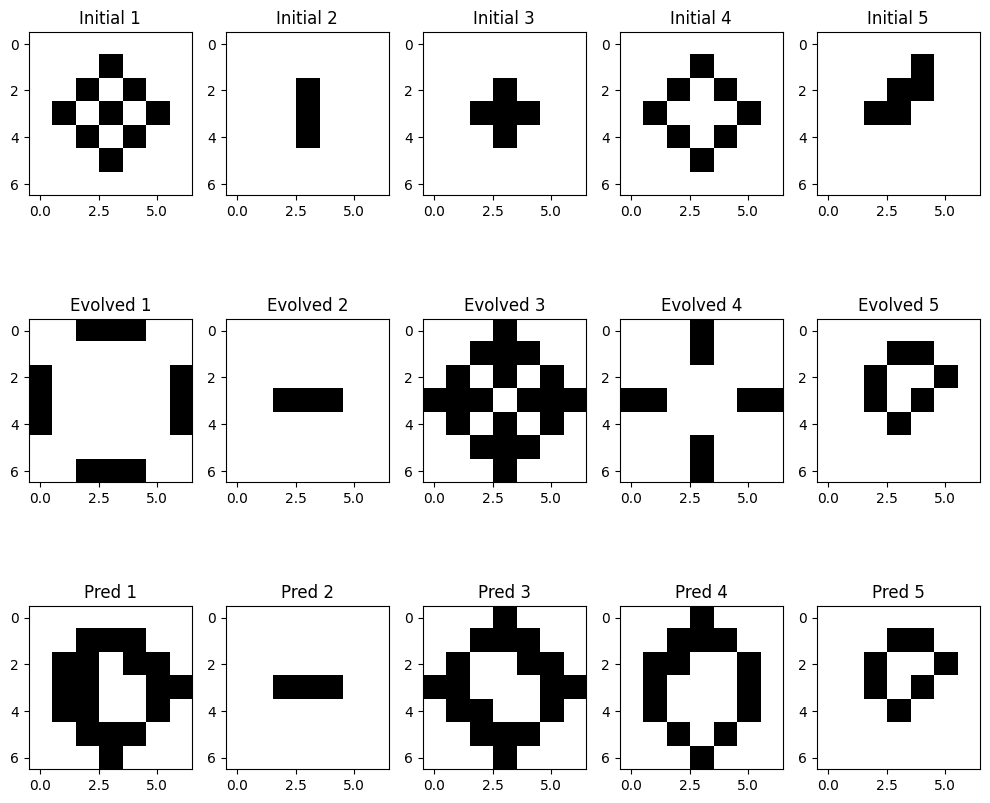

In [14]:
initial_states = torch.tensor([
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 1., 0., 1., 0., 0.],
    [0., 1., 0., 1., 0., 1., 0.],
    [0., 0., 1., 0., 1., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 1., 1., 1., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 1., 0., 1., 0., 0.],
    [0., 1., 0., 0., 0., 1., 0.],
    [0., 0., 1., 0., 1., 0., 0.],
    [0., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]],
    [[0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0.],
    [0., 0., 0., 1., 1., 0., 0.],
    [0., 0., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0.]]
    ])

display_nn_results(initial_states)